In [1]:

import pandas as pd 
import seaborn as sns 
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
df=pd.read_csv("Data Processing - Data dengan IPS.csv")

In [3]:
df.head()

,Asal Sekolah,Psikotest,TPA,IPS,Status
0,10,103,41.00,1.82,Ya
1,3,97,39.50,1.60,Ya
2,7,103,38.25,1.94,Ya
3,9,100,70.00,1.83,Ya
4,11,100,70.00,1.84,Ya


In [4]:
df.shape

(754, 5)

<AxesSubplot:xlabel='count', ylabel='Status'>

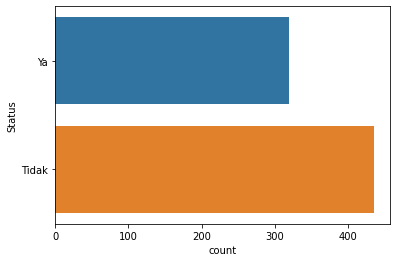

In [5]:
sns.countplot(y='Status', data=df)

In [6]:
#Kuantitas Data
df["Status"].value_counts()

Tidak    435
Ya       319
Name: Status, dtype: int64

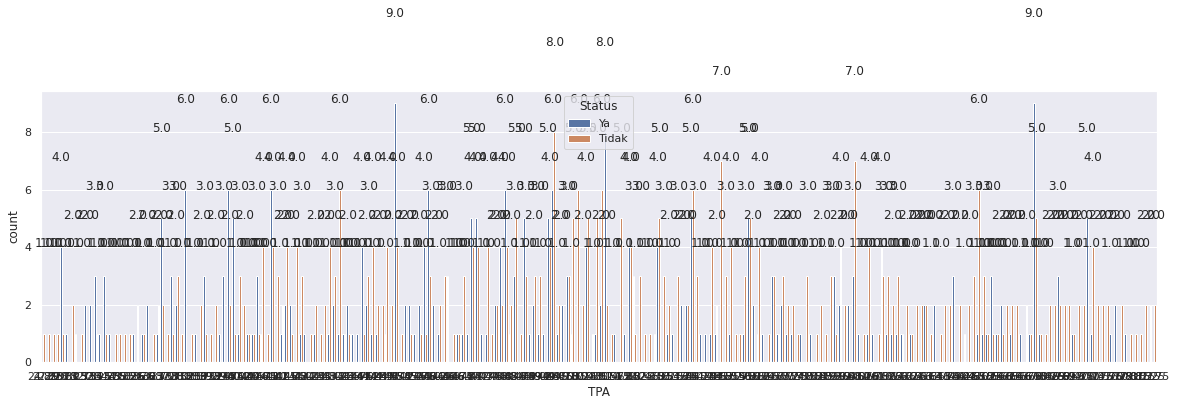

In [7]:
import matplotlib.pyplot as plt 

sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig, ax = plt.subplots(figsize=(20,5))
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.countplot(x='TPA',hue='Status',data=df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., 
          height + 3,
          height,
          ha="center")

In [8]:
#Memeriksa missing value
df.isnull().values.any()

#Memeriksa jumlah missing value pada keseluruhan atribut
df.isna().sum()

Asal Sekolah    0
Psikotest       0
TPA             0
IPS             0
Status          0
dtype: int64

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# read the CSV file into a pandas dataframe
df = pd.read_csv("Data Processing - Data dengan IPS.csv")

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode the categorical variable
df["Status"] = le.fit_transform(df["Status"])

# Convert the encoded categories into binary format
encoded_categories = pd.get_dummies(df["Status"], prefix=["Tidak", "Ya"])

# # Concatenate the original dataframe with the encoded categories dataframe
# df = pd.concat([df, encoded_categories], axis=1)

# Print the resulting dataframe
print(df.head())


   Asal Sekolah  Psikotest    TPA   IPS  Status
0            10        103  41.00  1.82       1
1             3         97  39.50  1.60       1
2             7        103  38.25  1.94       1
3             9        100  70.00  1.83       1
4            11        100  70.00  1.84       1


In [10]:
df["Status"]

0      1
1      1
2      1
3      1
4      1
      ..
749    1
750    1
751    1
752    1
753    1
Name: Status, Length: 754, dtype: int64

In [11]:
#Fungsi ordinal encoding pada atribut kategorik 

#ordinal encoding pada atribut IPS

# data=pd.read_csv("Data Processing - Data dengan IPS.csv")

#Define custom encoding function
def custom_encode(x):
  a=2
  if x <= a:
    return 1
  else:
    return 0

#Apply custom encoding to color attribute
df['IPS'] = df['IPS'].apply(custom_encode)

#Print the encoded data
print(df)


     Asal Sekolah  Psikotest    TPA  IPS  Status
0              10        103  41.00    1       1
1               3         97  39.50    1       1
2               7        103  38.25    1       1
3               9        100  70.00    1       1
4              11        100  70.00    1       1
..            ...        ...    ...  ...     ...
749           159         98  55.20    1       1
750             3        100  43.20    1       1
751             6        100  47.40    1       1
752            51         96  51.20    1       1
753            51         96  51.20    1       1

[754 rows x 5 columns]


In [12]:
#Fungsi ordinal encoding pada atribut kategorik 

#ordinal encoding pada atribut IPS

# data=pd.read_csv("Data Processing - Data dengan IPS.csv")

#Define custom encoding function
def custom_encode(x):
  a=50
  if x <= a:
    return 1
  else:
    return 0

#Apply custom encoding to color attribute
df['TPA'] = df['TPA'].apply(custom_encode)

#Print the encoded data
print(df)

     Asal Sekolah  Psikotest  TPA  IPS  Status
0              10        103    1    1       1
1               3         97    1    1       1
2               7        103    1    1       1
3               9        100    0    1       1
4              11        100    0    1       1
..            ...        ...  ...  ...     ...
749           159         98    0    1       1
750             3        100    1    1       1
751             6        100    1    1       1
752            51         96    0    1       1
753            51         96    0    1       1

[754 rows x 5 columns]


In [13]:
#Fungsi ordinal encoding pada atribut kategorik 

#ordinal encoding pada atribut IPS

# data=pd.read_csv("Data Processing - Data dengan IPS.csv")

#Define custom encoding function
def custom_encode(x):
  a=100
  if x <= a:
    return 1
  else:
    return 0

#Apply custom encoding to color attribute
df['Psikotest'] = df['Psikotest'].apply(custom_encode)

#Print the encoded data
print(df)

     Asal Sekolah  Psikotest  TPA  IPS  Status
0              10          0    1    1       1
1               3          1    1    1       1
2               7          0    1    1       1
3               9          1    0    1       1
4              11          1    0    1       1
..            ...        ...  ...  ...     ...
749           159          1    0    1       1
750             3          1    1    1       1
751             6          1    1    1       1
752            51          1    0    1       1
753            51          1    0    1       1

[754 rows x 5 columns]


In [14]:


# split data into features (X) and target (y)
X = df.drop('Status', axis=1)
y = df['Status']

# split data into training and testing sets (use random_state to ensure reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
X_train

,Asal Sekolah,Psikotest,TPA,IPS
234,7,0,0,1
131,5,1,1,1
44,26,0,0,1
70,36,1,1,1
497,68,0,0,0
...,...,...,...,...
71,37,1,1,1
106,44,0,1,1
270,84,0,1,0
435,28,0,0,0


In [16]:
y_train

234    1
131    1
44     1
70     1
497    0
      ..
71     1
106    1
270    0
435    0
102    1
Name: Status, Length: 603, dtype: int64

In [17]:
X_test

,Asal Sekolah,Psikotest,TPA,IPS
587,3,1,0,0
259,5,0,1,1
653,125,0,0,0
77,41,1,1,1
213,66,1,0,1
...,...,...,...,...
593,25,1,1,0
90,41,1,1,1
357,99,0,0,0
208,25,1,1,1


In [18]:
y_test

587    0
259    1
653    0
77     1
213    1
      ..
593    0
90     1
357    0
208    1
69     1
Name: Status, Length: 151, dtype: int64

In [19]:
neighbors=KNeighborsClassifier()

# fit the classifier to the training data
neighbors.fit(X_train, y_train)

# make predictions using the trained classifier
prediksi = neighbors.predict(X_test)
prediksi

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediksi)

array([[83,  2],
       [13, 53]])

In [21]:
f1 = f1_score(y_test, prediksi)
f1

0.8760330578512396

In [22]:
accuracy = accuracy_score(y_test, prediksi)
accuracy

0.9006622516556292

In [23]:
prediksi_train = neighbors.predict(X_train)
prediksi_train

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,

In [24]:
accuracy = accuracy_score(y_train, prediksi_train)
accuracy

0.9419568822553898

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        85
           1       0.96      0.80      0.88        66

    accuracy                           0.90       151
   macro avg       0.91      0.89      0.90       151
weighted avg       0.91      0.90      0.90       151



In [26]:
#Model KNN

X=df.drop(columns=['Status'], axis=1)
Y=df['Status']

#Inisialisasi KNN

neighbors=KNeighborsClassifier()

#Inisialisasi 10-Fold Cross Validation

folds=StratifiedKFold(n_splits=10)
counter=1

for train_index, test_index in folds.split(X,Y):

    X_train, X_test= X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = Y.iloc[train_index],Y.iloc[test_index]
    neighbors.fit(X_train,y_train) 
    Y_pred=neighbors.predict(X_test)

print("Accuracy in Fold-",counter,":",accuracy_score(y_test,Y_pred))
counter=counter+1

Accuracy in Fold- 1 : 0.7733333333333333


In [27]:
#Grid search 

# from sklearn.model_selection import train_test_split

n_neighbors=[21,23,25,27,29]
params={'n_neighbors':n_neighbors}

# KNN_Model=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=neighbors,param_grid=params, cv=5,verbose=2,n_jobs=4)
counter=1

for train_index,test_index in folds.split(X,Y):

    X_train, X_test= X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = Y.iloc[train_index],Y.iloc[test_index]
    grid_search.fit(X_train,y_train)
    counter=counter+1

    print('Best hyper:', grid_search.best_params_)
    print('Best score:', grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper: {'n_neighbors': 25}
Best score: 0.756437908496732
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper: {'n_neighbors': 23}
Best score: 0.7815032679738562
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper: {'n_neighbors': 29}
Best score: 0.74760348583878
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper: {'n_neighbors': 27}
Best score: 0.7594008714596949
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper: {'n_neighbors': 25}
Best score: 0.7289215686274509
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper: {'n_neighbors': 25}
Best score: 0.7450980392156863
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper: {'n_neighbors': 25}
Best score: 0.7362962962962963
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper: {'n_neighbors': 23}
Best score: 0.7804030501089325
Fitting 5 folds for

In [28]:
#Hyperparameter

X=df.drop(columns=['Status'],axis=1)
Y=df['Status']

neighbors=KNeighborsClassifier(n_neighbors=23)

#Inisialisasi 10-Fold Cross Validation

folds=StratifiedKFold(n_splits=5)
counter=1

for train_index, test_index in folds.split(X,Y):

    X_train, X_test= X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = Y.iloc[train_index],Y.iloc[test_index]
    neighbors.fit(X_train,y_train) 
    Y_pred=neighbors.predict(X_test)

print("Accuracy in Fold-",counter,":",accuracy_score(y_test,Y_pred))
counter=counter+1

Accuracy in Fold- 1 : 0.6933333333333334


In [29]:
pickle.dump(neighbors, open("model_TA.pkl", "wb"))